In [2]:
import os
import sqlite3
from dask.distributed import Client, LocalCluster

# set up cluster and workers
cluster = LocalCluster(n_workers=4,
threads_per_worker=1,
memory_limit='8GB') #my RAM size
client = Client(cluster)

# have a look at your workers client

import modin.pandas as pd
import seaborn as sns
import numpy as np
import re
#this sets up dask which is a multi processor library for data frames, 
#prob best to change the 64GB to 16GB and
#if this works you could try increasing the number of workers

In [3]:
def getlongestmatch(seq, umin = '2', umax = '', gapmin = '1', gapmax = '2', repeatmin = '2', repeatmax = ''):
  m = re.finditer(  '(([C]{' +umin+ ',' +umax+ '}[AGT]{' +gapmin+ ',' +gapmax+ '}){' +repeatmin+ ',' +repeatmax+ '})|(([G]{' +umin+ ',' +umax+ '}[ACT]{' +gapmin+ ',' +gapmax+ '}){' +repeatmin+ ',' +repeatmax+ '})',seq, flags = re.IGNORECASE)
  longest = ''
  lcount = 0
  span = ''
  for match in m:
    lcount += 1
    if len(match.group()) > len(longest):
      longest = match.group() #.group() tells you what exactly they found e.g. CCCCCC
      span = match.span() #tells you where exactly a match is found (startindx,endindex)
  m = re.finditer('(([C]{' +umin+ ',' +umax+ '}[AGT]{' +gapmin+ ',' +gapmax+ '}){' +repeatmin+ ',' +repeatmin+ '})|(([G]{' +umin+ ',' +umax+ '}[ACT]{' +gapmin+ ',' +gapmax+ '}){' +repeatmin+ ',' +repeatmin+ '})',seq, flags = re.IGNORECASE)
  count = 0
  for match in m:
    count += 1
  return longest, len(longest), span, lcount, count
#function to find the longest match of...GC?
#variable m stores function that iterates and finds through a genetic sequence string, from left to right I'm guessing C or G?
#m is short for match 
#print different things!!
#play around with regex and then plot different ones, some with Gs somewith Cs

In [4]:
con = sqlite3.connect('C:/Users/44795/Documents/release_db_v5 - Copy.sqlite3')

In [5]:
# df = pd.read_sql_query('SELECT extra_gc.chromosome,extra_gc.start_idx,extra_gc.end_idx,extra_gc.sequence,extra_gc.state_name,extra_gc.gc,extra_gc.gc_min,extra_gc.gc_max,repeats.repeat_seq,repeats.hmm_state_id,repeats.has_gquad,repeats.has_repeats,repeats.n_repeats,repeats.align_seq,repeats.unit_seq from extra_gc left join repeats on (extra_gc.start_idx=repeats.start_idx and extra_gc.chromosome=repeats.chromosome) order by extra_gc.chromosome,extra_gc.start_idx ', con)
mydata = pd.read_sql('SELECT * from combined order by chromosome,start_idx ', con)
#this took a lot quicker this time-under a minute

To request implementation, send an email to feature_requests@modin.org.


In [7]:
mydata['longest'],mydata['length'],mydata['span'], mydata['longCount'], mydata['shortCount'] = zip(*mydata.sequence.apply(lambda x: getlongestmatch(x,'4','','1','5','2','')))
#longest runtime here-only have to execute once
#took like 5-10mins

In [6]:
mydata.iloc[0:100]
#displays rows from 300 to 400
#df.set_option('display.max_columns', None) #to display all rows and columns
#pd.set_option('display.max_rows') run them then comment them out 

,chromosome,start_idx,end_idx,sequence,state_name,gc,gc_min,gc_max,repchr,repstart,...,n_repeats,align_seq,unit_seq,ISTATE,region_length,longest,length,span,longCount,shortCount
0,chr1,10101,10800,CTAACCCAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAC...,TUF,63.0,50.0,84.0,chr1,10101.0,...,32.0,ccaaccctaaccctaaccctaaccctaaccctaaccctaaccctaa...,CCAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAA...,TUFCORE,699,CCCCAACCCCAACCCCAACCCCAACCCCAACCCCAA,36,"(186, 222)",2,4
1,chr1,10801,11600,ACATGCTAGCGCGTCGGGGTGGAGGCGTGGCGCAGGCGCAGAGAGG...,DELETION,63.0,30.0,75.0,chr1,10801.0,...,3.0,catgctagcgcgtcggggtggaggcgtggcgcaggcgcagagaggc...,CATGCTAGCGCGTCGGGGTGGAGGCGTGGCGCAGGCGCAGAGAGGC...,CORE,799,GGGGGTTGGGGGGGC,15,"(211, 226)",2,2
2,chr1,11601,16900,CACCAGCAATGTCTAGGAATGCCTGTTTCTCCACAAAGTGTTTACT...,TUF,57.0,40.0,71.0,chr1,11601.0,...,0.0,NO_ALIGN,NO_UNIT,TUFCORE,5299,CCCCCAGCCCCCGGAGA,17,"(3275, 3292)",3,3
3,chr1,16901,17900,GAATGGTGCCAGGGGCAGAGGGGGCAATGCCGGGGCCCAGGTCGGC...,NORMAL,60.0,55.0,70.0,None,NaN,...,NaN,None,None,NORMAL,999,,0,,0,0
4,chr1,17901,19400,GCGGCCAGCAGACCTGCAGGGCCCGCTCGTCCAGGGGGCGGTGCTT...,TUF,60.0,53.0,75.0,None,NaN,...,NaN,None,None,TUF,1499,GGGGTATGGGGACTAC,16,"(350, 366)",1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,chr1,170701,176300,GAGTGGGGCAGAGCAGGGAGGAGTCCTGCACAGAGGAGAGGCAGGG...,NORMAL,48.0,21.0,67.0,None,NaN,...,NaN,None,None,NORMAL,5599,GGGGGTGGGGCAT,13,"(762, 775)",3,3
96,chr1,176301,176400,AAATGAAGATAATTACTGTGTTAAACACAGTTTCATAGAAAATAAA...,DELETION,26.0,26.0,26.0,None,NaN,...,NaN,None,None,DELETION,99,,0,,0,0
97,chr1,176401,180000,CACAGCTAAAGAAACAGGCTCAGAGAATGTTATTTGATTGGACCGT...,NORMAL,40.0,28.0,50.0,chr1,176599.0,...,0.0,NO_ALIGN,NO_UNIT,NORMAL,3599,,0,,0,0
98,chr1,180001,183400,AAACATGTCTTAATAGCCTTTACATTATGTAATAGTGTAATACAAA...,TUF,56.0,22.0,86.0,None,NaN,...,NaN,None,None,TUF,3399,GGGGGCGGGGGGGGGGGGGGGGGC,24,"(1576, 1600)",6,6


In [7]:
mydata['ISTATE'].value_counts()

NORMAL         31956
TUF            18314
DUPLICATION     9876
DELETION        6526
TUFCORE         5100
CORE            2557
Name: ISTATE, dtype: int64

In [8]:
mydata.shape

(74329, 25)

In [9]:
mydata.info()
#can help with showing you what you're plotting exactly

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 74329 entries, 0 to 74328
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  -------------  --------------  -----  
 0   chromosome     74329 non-null  object
 1   start_idx      74329 non-null  int64
 2   end_idx        74329 non-null  int64
 3   sequence       74329 non-null  object
 4   state_name     74329 non-null  object
 5   gc             74329 non-null  float64
 6   gc_min         74329 non-null  float64
 7   gc_max         74329 non-null  float64
 8   repchr         18781 non-null  object
 9   repstart       18781 non-null  float64
 10  repend         18781 non-null  float64
 11  repeat_seq     18781 non-null  object
 12  hmm_state_id   18781 non-null  float64
 13  has_gquad      18781 non-null  float64
 14  has_repeats    18781 non-null  float64
 15  n_repeats      18781 non-null  float64
 16  align_seq      18781 non-null  object
 17  unit_seq       18781 non-null  object
 18  ISTATE      

In [10]:
mydata.describe()
#this is very very useful - can separate the data to show each region and then plot - so select all just TUF, Normal etc

,start_idx,end_idx,gc,gc_min,gc_max,repstart,repend,hmm_state_id,has_gquad,has_repeats,n_repeats,region_length,length,longCount,shortCount
count,7.432900e+04,7.432900e+04,74329.000000,74329.000000,74329.000000,1.878100e+04,1.878100e+04,18781.000000,18781.000000,18781.000000,18781.000000,7.432900e+04,74329.000000,74329.000000,74329.000000
mean,6.746681e+07,6.750175e+07,46.502025,33.718750,59.837977,6.859924e+07,6.860131e+07,1.543848,0.112667,0.243597,2.728183,3.494699e+04,8.234390,7.279110,7.415141
std,5.950477e+07,5.951256e+07,12.918565,16.995969,16.160981,6.025902e+07,6.025893e+07,0.721389,0.316194,0.429264,9.912781,1.172664e+05,10.615572,24.021346,24.378829
min,1.000100e+04,1.010000e+04,0.000000,0.000000,0.000000,1.000100e+04,1.040000e+04,1.000000,0.000000,0.000000,0.000000,9.900000e+01,0.000000,0.000000,0.000000
25%,1.684900e+07,1.685590e+07,38.000000,22.000000,50.000000,1.716460e+07,1.716470e+07,1.000000,0.000000,0.000000,0.000000,2.990000e+02,0.000000,0.000000,0.000000
50%,5.404780e+07,5.411550e+07,45.000000,32.000000,62.000000,5.613984e+07,5.614084e+07,1.000000,0.000000,0.000000,0.000000,7.990000e+02,0.000000,0.000000,0.000000
75%,1.051301e+08,1.051603e+08,55.000000,44.000000,71.000000,1.103226e+08,1.103228e+08,2.000000,0.000000,0.000000,0.000000,4.899000e+03,17.000000,3.000000,3.000000
max,2.489407e+08,2.489464e+08,100.000000,100.000000,100.000000,2.487444e+08,2.487454e+08,3.000000,1.000000,1.000000,595.000000,2.406599e+06,247.000000,632.000000,645.000000


In [14]:
mydatanormal = mydata[mydata['ISTATE'] == 'NORMAL']
mydatanormal

,chromosome,start_idx,end_idx,sequence,state_name,gc,gc_min,gc_max,repchr,repstart,...,n_repeats,align_seq,unit_seq,ISTATE,region_length,longest,length,span,longCount,shortCount
3,chr1,16901,17900,GAATGGTGCCAGGGGCAGAGGGGGCAATGCCGGGGCCCAGGTCGGC...,NORMAL,60.0,55.0,70.0,None,NaN,...,NaN,None,None,NORMAL,999,,0,,0,0
5,chr1,19401,21500,TCATGAGGAAAGGGAGGGGGAGGATGTGGGATGGTGGAGGGGCTGC...,NORMAL,53.0,35.0,65.0,None,NaN,...,NaN,None,None,NORMAL,2099,CCCCTGCCCCTGT,13,"(1645, 1658)",2,2
7,chr1,22201,23700,CTTTCCTGCTGGACCTGACCCTGTGTCATGTCACCTTGCTACCACG...,NORMAL,52.0,37.0,65.0,None,NaN,...,NaN,None,None,NORMAL,1499,,0,,0,0
9,chr1,23801,26900,GAAGCTGCAGCCCTCCAGCTCGCCTCCCTCAATGGCCACTCCGTGC...,NORMAL,51.0,30.0,65.0,None,NaN,...,NaN,None,None,NORMAL,3099,,0,,0,0
11,chr1,27101,29400,AAAAGAAACAGCTTGAACAAAAAGTGTGTAGGGGAACCGCAAGCGG...,NORMAL,46.0,20.0,79.0,None,NaN,...,NaN,None,None,NORMAL,2299,,0,,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74319,chr9,138283900,138285599,GTAGAGGCAACTGGGTGTCAGGAGACATGATGGAGAGGAAAGCATC...,NORMAL,49.0,33.0,69.0,None,NaN,...,NaN,None,None,NORMAL,1699,,0,,0,0
74322,chr9,138286000,138286099,AGTGAGCTGAGATCGCACCAGTGCACTCCAGCCTGGGCAACAGAGT...,NORMAL,42.0,42.0,42.0,None,NaN,...,NaN,None,None,NORMAL,99,,0,,0,0
74324,chr9,138286200,138294099,GTTCAGCCACACTGCTTTGGTGTCACAACTGCACATTGGTTTCACA...,NORMAL,34.0,14.0,56.0,chr9,138286563.0,...,0.0,NO_ALIGN,NO_UNIT,NORMAL,7899,,0,,0,0
74326,chr9,138294500,138313799,GTATGGATAAGGCCCTGAGTCATCTTCCTGAGCTGAATGATAGTTA...,NORMAL,37.0,20.0,63.0,chr9,138297703.0,...,0.0,NO_ALIGN,NO_UNIT,NORMAL,19299,CCCCATAGCCCCCATAATCCCCA,23,"(881, 904)",2,2


In [15]:
mydatanormal.describe()

,start_idx,end_idx,gc,gc_min,gc_max,repstart,repend,hmm_state_id,has_gquad,has_repeats,n_repeats,region_length,length,longCount,shortCount
count,3.195600e+04,3.195600e+04,31956.000000,31956.000000,31956.000000,1.112400e+04,1.112400e+04,11124.0,11124.000000,11124.000000,11124.000000,3.195600e+04,31956.000000,31956.000000,31956.000000
mean,6.981964e+07,6.989906e+07,44.252785,25.195550,65.136782,7.322194e+07,7.322294e+07,1.0,0.008270,0.076861,0.546386,7.942570e+04,12.030386,15.207066,15.422237
std,5.939002e+07,5.940509e+07,8.931012,14.686835,13.246151,5.902003e+07,5.902003e+07,0.0,0.090569,0.266382,2.415953,1.688208e+05,11.018369,34.773993,35.290605
min,1.030100e+04,1.230000e+04,0.000000,0.000000,0.000000,1.900800e+04,2.000800e+04,1.0,0.000000,0.000000,0.000000,9.900000e+01,0.000000,0.000000,0.000000
25%,1.896472e+07,1.912275e+07,38.000000,15.000000,57.000000,2.290372e+07,2.290472e+07,1.0,0.000000,0.000000,0.000000,7.990000e+02,0.000000,0.000000,0.000000
50%,5.897070e+07,5.912900e+07,43.000000,23.000000,66.000000,6.301162e+07,6.301262e+07,1.0,0.000000,0.000000,0.000000,4.499000e+03,15.000000,1.000000,1.000000
75%,1.070836e+08,1.073595e+08,50.000000,34.000000,75.000000,1.119004e+08,1.119014e+08,1.0,0.000000,0.000000,0.000000,7.682400e+04,21.000000,14.000000,14.000000
max,2.489379e+08,2.489382e+08,95.000000,95.000000,97.000000,2.487444e+08,2.487454e+08,1.0,1.000000,1.000000,36.000000,2.406599e+06,247.000000,632.000000,645.000000


In [18]:
mydatanormal.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,chromosome,start_idx,end_idx,sequence,state_name,gc,gc_min,gc_max,repchr,repstart,...,n_repeats,align_seq,unit_seq,ISTATE,region_length,longest,length,span,longCount,shortCount
13,chr1,29501,55300,GGCCGAGTCGCGGGCCTGGGCACGGAACTCACGCTCACTCCGAGCT...,NORMAL,40.0,17.0,82.0,chr1,33220.0,...,0.0,NO_ALIGN,NO_UNIT,NORMAL,25799,GGGGCTAAGGGGAGGGGA,18,"(3768, 3786)",10,10
19,chr1,56701,60700,ATACAGCTCTAAACAAATGCCACTGTAAACCAAGGTGGAGCCTTTG...,NORMAL,34.0,25.0,50.0,chr1,57291.0,...,0.0,NO_ALIGN,NO_UNIT,NORMAL,3999,,0,,0,0
27,chr1,67301,69400,TAAGATCACTAAATTTTTATAGGACTTTAAAAACAGTAATGTGCTG...,NORMAL,34.0,19.0,47.0,chr1,68249.0,...,0.0,NO_ALIGN,NO_UNIT,NORMAL,2099,,0,,0,0
29,chr1,69601,72100,ATTGTGACCTTCCTAGGGTAATCAAACTTGCCTGTACAGATACCTA...,NORMAL,32.0,21.0,47.0,chr1,69782.0,...,0.0,NO_ALIGN,NO_UNIT,NORMAL,2499,,0,,0,0
62,chr1,91701,94900,ACCCCAGACTCACTAAGCCAAAGGGAAAAGCCAAGCTGGGAACTGG...,NORMAL,42.0,31.0,55.0,chr1,91925.0,...,0.0,NO_ALIGN,NO_UNIT,NORMAL,3199,CCCCTTTCCCCAATA,15,"(229, 244)",2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74299,chr9,138216000,138220599,ATAACACAGGCAAGACATGGTTTTTAGATACGTTCAGAATAGATAG...,NORMAL,50.0,34.0,65.0,chr9,138217149.0,...,0.0,NO_ALIGN,NO_UNIT,NORMAL,4599,CCCCCAGTGGCCCCCAAGTA,20,"(3215, 3235)",2,2
74303,chr9,138226600,138231399,GTCAAAGACTAAAATATTTTAAGAGATGTATTCTGAGCCAAATATG...,NORMAL,39.0,25.0,61.0,chr9,138229514.0,...,0.0,NO_ALIGN,NO_UNIT,NORMAL,4799,CCCCCCACCCCCCA,14,"(2431, 2445)",3,3
74312,chr9,138237500,138278999,AAGAATGGCCTTGGTTTCTGTGGGCAGTGCCTCCTCATGGAAGGGT...,NORMAL,45.0,21.0,77.0,chr9,138250205.0,...,0.0,NO_ALIGN,NO_UNIT,NORMAL,41499,GGGGTGGGGGTGGGGCTA,18,"(11378, 11396)",7,7
74324,chr9,138286200,138294099,GTTCAGCCACACTGCTTTGGTGTCACAACTGCACATTGGTTTCACA...,NORMAL,34.0,14.0,56.0,chr9,138286563.0,...,0.0,NO_ALIGN,NO_UNIT,NORMAL,7899,,0,,0,0


In [19]:
mydatanormal.describe()
#okay so there's no difference when you filter out the rows that have empty values
#unless it's just doing that in pandas for display purposes?
#makes sense why some values are zero because they are boolean

,start_idx,end_idx,gc,gc_min,gc_max,repstart,repend,hmm_state_id,has_gquad,has_repeats,n_repeats,region_length,length,longCount,shortCount
count,3.195600e+04,3.195600e+04,31956.000000,31956.000000,31956.000000,1.112400e+04,1.112400e+04,11124.0,11124.000000,11124.000000,11124.000000,3.195600e+04,31956.000000,31956.000000,31956.000000
mean,6.981964e+07,6.989906e+07,44.252785,25.195550,65.136782,7.322194e+07,7.322294e+07,1.0,0.008270,0.076861,0.546386,7.942570e+04,12.030386,15.207066,15.422237
std,5.939002e+07,5.940509e+07,8.931012,14.686835,13.246151,5.902003e+07,5.902003e+07,0.0,0.090569,0.266382,2.415953,1.688208e+05,11.018369,34.773993,35.290605
min,1.030100e+04,1.230000e+04,0.000000,0.000000,0.000000,1.900800e+04,2.000800e+04,1.0,0.000000,0.000000,0.000000,9.900000e+01,0.000000,0.000000,0.000000
25%,1.896472e+07,1.912275e+07,38.000000,15.000000,57.000000,2.290372e+07,2.290472e+07,1.0,0.000000,0.000000,0.000000,7.990000e+02,0.000000,0.000000,0.000000
50%,5.897070e+07,5.912900e+07,43.000000,23.000000,66.000000,6.301162e+07,6.301262e+07,1.0,0.000000,0.000000,0.000000,4.499000e+03,15.000000,1.000000,1.000000
75%,1.070836e+08,1.073595e+08,50.000000,34.000000,75.000000,1.119004e+08,1.119014e+08,1.0,0.000000,0.000000,0.000000,7.682400e+04,21.000000,14.000000,14.000000
max,2.489379e+08,2.489382e+08,95.000000,95.000000,97.000000,2.487444e+08,2.487454e+08,1.0,1.000000,1.000000,36.000000,2.406599e+06,247.000000,632.000000,645.000000


# WHICH STATE HAS THE HIGHEST NUMBER OF REPEATS? I don't think this is right..
The highest number of repeats found is 595
Normal has 36 repeats
TUFCORE has 595 repeats
CORE has 135 repeats

# Comparing mean, std, median and max gc content (because min is always 0):
    CORE: 59.09, 15.78, 63, 100
    Deletion: 52.11, 17.86, 54, 97
    Normal: 44.25, 8.93, 43, 95
    TUF: 51.30, 12.39, 51, 91
    TUFCORE: 52.37, 11.31, 54, 87
    Duplication: 34.89, 9.91, 34, 81
#summaries on diff istates-average, size range of them, size differences, numbers, how many have repeats, stats on pattern matching, compare the patterns
# Core region seems to have highest gc content
# Core and Deletion have similar values which make sense because of TUFCORE

In [21]:
mydata[mydata['ISTATE'] == 'TUF'].describe()

,start_idx,end_idx,gc,gc_min,gc_max,repstart,repend,hmm_state_id,has_gquad,has_repeats,n_repeats,region_length,length,longCount,shortCount
count,1.831400e+04,1.831400e+04,18314.000000,18314.000000,18314.000000,0.0,0.0,0.0,0.0,0.0,0.0,18314.000000,18314.000000,18314.000000,18314.000000
mean,6.961708e+07,6.961837e+07,51.300972,41.068800,60.886371,NaN,NaN,NaN,NaN,NaN,NaN,1296.286229,5.923665,1.035874,1.075571
std,6.211793e+07,6.211793e+07,12.391741,13.879837,13.412155,NaN,NaN,NaN,NaN,NaN,NaN,2572.550147,8.601453,2.567980,2.650086
min,1.000100e+04,1.030000e+04,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,0.000000,0.000000,0.000000
25%,1.662660e+07,1.662740e+07,43.000000,32.000000,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,399.000000,0.000000,0.000000,0.000000
50%,5.383565e+07,5.383600e+07,51.000000,39.000000,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,599.000000,0.000000,0.000000,0.000000
75%,1.134449e+08,1.134451e+08,59.000000,50.000000,69.000000,NaN,NaN,NaN,NaN,NaN,NaN,1199.000000,13.000000,1.000000,1.000000
max,2.489407e+08,2.489464e+08,91.000000,91.000000,96.000000,NaN,NaN,NaN,NaN,NaN,NaN,74999.000000,169.000000,59.000000,62.000000


In [8]:
mydata[mydata['ISTATE'] == 'TUFCORE'].describe()

,start_idx,end_idx,gc,gc_min,gc_max,repstart,repend,hmm_state_id,has_gquad,has_repeats,n_repeats,region_length,length,longCount,shortCount
count,5.100000e+03,5.100000e+03,5100.000000,5100.000000,5100.000000,5.100000e+03,5.100000e+03,5100.0,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000
mean,6.288722e+07,6.289245e+07,52.366275,36.683529,65.313922,6.288722e+07,6.289245e+07,2.0,0.197059,0.478039,5.719412,5231.549020,10.954510,4.954902,5.083137
std,6.195009e+07,6.195012e+07,11.310603,14.063058,14.152355,6.195009e+07,6.195012e+07,0.0,0.397816,0.499566,16.046067,6893.204285,10.129011,9.267056,9.538300
min,1.000100e+04,1.040000e+04,0.000000,0.000000,1.000000,1.000100e+04,1.040000e+04,2.0,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000
25%,7.480975e+06,7.481874e+06,45.000000,27.000000,57.000000,7.480975e+06,7.481874e+06,2.0,0.000000,0.000000,0.000000,499.000000,0.000000,0.000000,0.000000
50%,4.431535e+07,4.432210e+07,54.000000,34.000000,69.000000,4.431535e+07,4.432210e+07,2.0,0.000000,0.000000,0.000000,2299.000000,13.000000,1.000000,1.000000
75%,1.102209e+08,1.102264e+08,60.000000,44.250000,75.000000,1.102209e+08,1.102264e+08,2.0,0.000000,1.000000,6.000000,7399.000000,18.000000,6.000000,6.000000
max,2.473736e+08,2.473744e+08,87.000000,87.000000,95.000000,2.473736e+08,2.473744e+08,2.0,1.000000,1.000000,595.000000,48499.000000,102.000000,78.000000,78.000000


In [28]:
mydata[mydata['ISTATE'] == 'CORE'].describe() #shorter way of doing it
#do it without missing values as well-but I removed iT-doesn't make a difference
#or you can just do mydata['CORE'].decribe()
#you can do mydata['CORE'].mean() #median() etc

,start_idx,end_idx,gc,gc_min,gc_max,repstart,repend,hmm_state_id,has_gquad,has_repeats,n_repeats,region_length,length,longCount,shortCount
count,2.557000e+03,2.557000e+03,2557.000000,2557.000000,2557.000000,2.557000e+03,2.557000e+03,2557.0,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000
mean,5.988134e+07,5.988180e+07,59.086820,55.423543,62.979273,5.988134e+07,5.988180e+07,3.0,0.398514,0.501369,6.253813,462.511928,9.069613,2.271021,2.610872
std,6.025533e+07,6.025533e+07,15.781082,16.192266,16.302427,6.025533e+07,6.025533e+07,0.0,0.489688,0.500096,11.486201,673.139255,14.401324,4.542151,5.059189
min,1.040100e+04,1.050000e+04,0.000000,0.000000,0.000000,1.040100e+04,1.050000e+04,3.0,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000
25%,1.145690e+07,1.145720e+07,47.000000,41.000000,53.000000,1.145690e+07,1.145720e+07,3.0,0.000000,0.000000,0.000000,199.000000,0.000000,0.000000,0.000000
50%,3.649670e+07,3.649740e+07,63.000000,59.000000,67.000000,3.649670e+07,3.649740e+07,3.0,0.000000,1.000000,2.000000,299.000000,0.000000,0.000000,0.000000
75%,1.028019e+08,1.028021e+08,70.000000,67.000000,74.000000,1.028019e+08,1.028021e+08,3.0,1.000000,1.000000,8.000000,499.000000,15.000000,3.000000,3.000000
max,2.473735e+08,2.473736e+08,100.000000,100.000000,100.000000,2.473735e+08,2.473736e+08,3.0,1.000000,1.000000,135.000000,12699.000000,157.000000,83.000000,83.000000


In [9]:
mydata[mydata['ISTATE'] == 'DUPLICATION'].describe() #shorter way of doing it

,start_idx,end_idx,gc,gc_min,gc_max,repstart,repend,hmm_state_id,has_gquad,has_repeats,n_repeats,region_length,length,longCount,shortCount
count,9.876000e+03,9.876000e+03,9876.000000,9876.000000,9876.000000,0.0,0.0,0.0,0.0,0.0,0.0,9876.000000,9876.000000,9876.000000,9876.000000
mean,6.317714e+07,6.317770e+07,34.888011,30.602066,39.836371,NaN,NaN,NaN,NaN,NaN,NaN,555.692993,0.659072,0.071385,0.071993
std,5.468158e+07,5.468147e+07,9.919015,9.925709,12.219244,NaN,NaN,NaN,NaN,NaN,NaN,1316.411216,3.207256,0.497556,0.500715
min,1.460100e+04,1.580000e+04,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,0.000000,0.000000,0.000000
25%,1.676672e+07,1.676682e+07,28.000000,24.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,0.000000,0.000000,0.000000
50%,5.201600e+07,5.201635e+07,34.000000,29.000000,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,299.000000,0.000000,0.000000,0.000000
75%,9.087565e+07,9.087575e+07,39.000000,36.000000,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,499.000000,0.000000,0.000000,0.000000
max,2.489406e+08,2.489407e+08,81.000000,81.000000,93.000000,NaN,NaN,NaN,NaN,NaN,NaN,43399.000000,34.000000,20.000000,20.000000


In [10]:
mydata[mydata['ISTATE'] == 'DELETION'].describe() #shorter way of doing it

,start_idx,end_idx,gc,gc_min,gc_max,repstart,repend,hmm_state_id,has_gquad,has_repeats,n_repeats,region_length,length,longCount,shortCount
count,6.526000e+03,6.526000e+03,6526.000000,6526.000000,6526.000000,0.0,0.0,0.0,0.0,0.0,0.0,6526.000000,6526.000000,6526.000000,6526.000000
mean,6.295401e+07,6.295437e+07,52.110634,48.723261,55.707937,NaN,NaN,NaN,NaN,NaN,NaN,360.998161,5.142047,0.664879,0.814894
std,5.618987e+07,5.618988e+07,17.862927,18.663942,18.273358,NaN,NaN,NaN,NaN,NaN,NaN,1214.293894,10.791875,1.824066,2.097194
min,1.000100e+04,1.010000e+04,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,0.000000,0.000000,0.000000
25%,1.864060e+07,1.864070e+07,41.000000,36.000000,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,0.000000,0.000000,0.000000
50%,4.647305e+07,4.647330e+07,54.000000,51.000000,59.000000,NaN,NaN,NaN,NaN,NaN,NaN,199.000000,0.000000,0.000000,0.000000
75%,9.031022e+07,9.031040e+07,64.000000,62.000000,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,299.000000,0.000000,0.000000,0.000000
max,2.487467e+08,2.487474e+08,97.000000,97.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,49099.000000,160.000000,55.000000,55.000000


# Typically for continuous data but still try...

CORE had the highest density, followed by DELETION and had the narrower ranges of region lengths
CORE, DELETION and DUPLICATION are highly concentrated at similar region lengths
TUFCORE and TUF have widest distribution
NORMAL doesn't have a distribution?


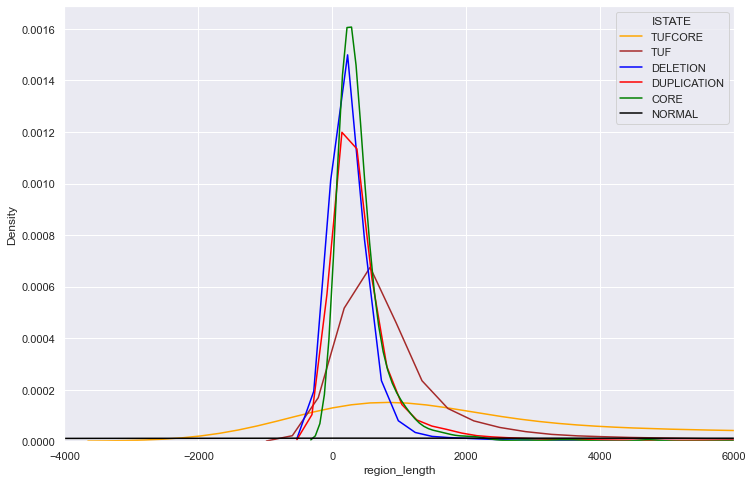

In [202]:
sns.kdeplot(data=mydata[mydata["ISTATE"] == "TUFCORE"], x="region_length", color='orange')
sns.kdeplot(data=mydata[mydata["ISTATE"] == "TUF"], x="region_length", color='brown')
sns.kdeplot(data=mydata[mydata["ISTATE"] == "DELETION"], x="region_length", color='blue')
sns.kdeplot(data=mydata[mydata["ISTATE"] == "DUPLICATION"], x="region_length", color='red')
sns.kdeplot(data=mydata[mydata["ISTATE"] == "CORE"], x="region_length", color='green')
sns.kdeplot(data=mydata[mydata["ISTATE"] == "NORMAL"], x="region_length", color='black')
plt.legend(title='ISTATE', loc='upper right', labels=['TUFCORE', 'TUF','DELETION','DUPLICATION','CORE', 'NORMAL'])
plt.xlim(-4000, 6000)
#density plots are like histograms
#why is normal line flat?
print("CORE had the highest density, followed by DELETION and had the narrower ranges of region lengths")
print("CORE, DELETION and DUPLICATION are highly concentrated at similar region lengths")
print("TUFCORE and TUF have widest distribution")
print("NORMAL doesn't have a distribution?")

<AxesSubplot:xlabel='region_length', ylabel='Density'>

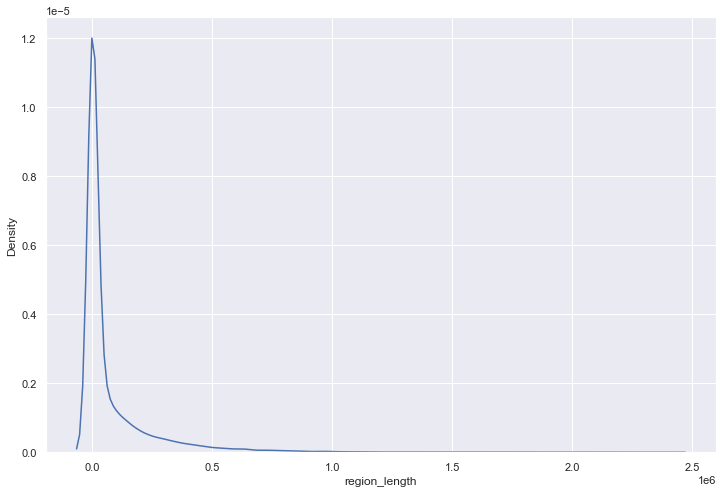

In [200]:
sns.kdeplot(data=df[df["ISTATE"] == "NORMAL"], x="region_length")

# Categorical analysis and visualisation

<AxesSubplot:>

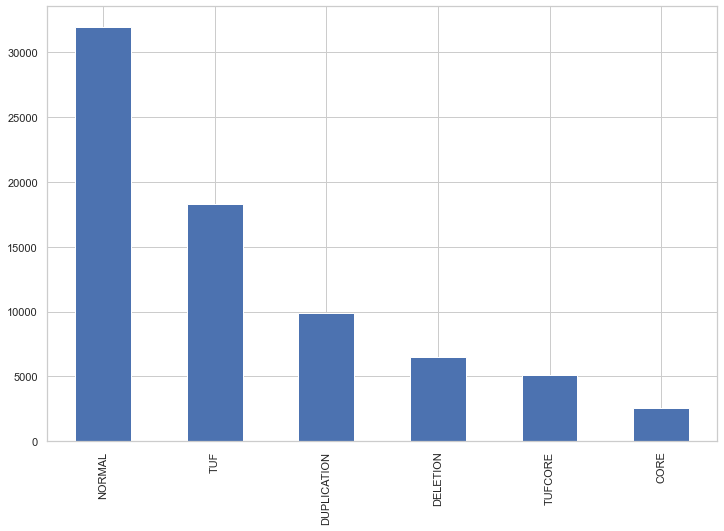

In [82]:
mydata['ISTATE'].value_counts().plot(kind='bar')
#normal is the most commonly found region in the sequence, followed by TUF

<AxesSubplot:ylabel='ISTATE'>

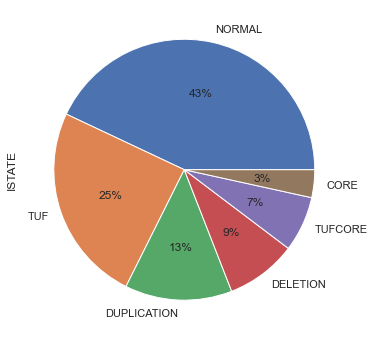

In [180]:
mydata['ISTATE'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(6,6))
#THIS IS NICE

In [48]:
mydata.info() 
#can help with showing you what you're plotting exactly

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 74329 entries, 0 to 74328
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  -------------  --------------  -----  
 0   chromosome     74329 non-null  object
 1   start_idx      74329 non-null  int64
 2   end_idx        74329 non-null  int64
 3   sequence       74329 non-null  object
 4   state_name     74329 non-null  object
 5   gc             74329 non-null  float64
 6   gc_min         74329 non-null  float64
 7   gc_max         74329 non-null  float64
 8   repchr         18781 non-null  object
 9   repstart       18781 non-null  float64
 10  repend         18781 non-null  float64
 11  repeat_seq     18781 non-null  object
 12  hmm_state_id   18781 non-null  float64
 13  has_gquad      18781 non-null  float64
 14  has_repeats    18781 non-null  float64
 15  n_repeats      18781 non-null  float64
 16  align_seq      18781 non-null  object
 17  unit_seq       18781 non-null  object
 18  ISTATE      

In [57]:
mydata['n_repeats'].median()

2.7281827378733827

# Correlation analysis - is there a relationship between the columns? Not really?

In [61]:
corr = mydata.corr()
corr
#not really sure what this shows tbh

,start_idx,end_idx,gc,gc_min,gc_max,repstart,repend,hmm_state_id,has_gquad,has_repeats,n_repeats,region_length,length,longCount,shortCount
start_idx,1.000000,0.999998,-0.004324,-0.050154,0.065688,0.999999,0.999999,-0.089885,-0.012021,-0.013295,0.004483,0.065471,0.067061,0.037384,0.037344
end_idx,0.999998,1.000000,-0.004592,-0.050986,0.066336,0.999999,0.999999,-0.090683,-0.012370,-0.013752,0.004237,0.067433,0.067947,0.039011,0.038968
gc,-0.004324,-0.004592,1.000000,0.767082,0.690973,-0.030064,-0.030054,0.500541,0.453706,0.344396,0.187692,-0.136528,0.228154,-0.024855,-0.022556
gc_min,-0.050154,-0.050986,0.767082,1.000000,0.127189,-0.076128,-0.076131,0.710284,0.386764,0.317856,0.179296,-0.425657,-0.230164,-0.351141,-0.348904
gc_max,0.065688,0.066336,0.690973,0.127189,1.000000,0.104047,0.104059,-0.206699,0.190102,0.045776,0.019233,0.333221,0.630519,0.371615,0.372795
repstart,0.999999,0.999999,-0.030064,-0.076128,0.104047,1.000000,1.000000,-0.090296,-0.012207,-0.013540,0.004348,0.077842,0.077642,0.030846,0.030732
repend,0.999999,0.999999,-0.030054,-0.076131,0.104059,1.000000,1.000000,-0.090286,-0.012186,-0.013514,0.004369,0.077836,0.077654,0.030848,0.030734
hmm_state_id,-0.089885,-0.090683,0.500541,0.710284,-0.206699,-0.090296,-0.090286,1.000000,0.441726,0.432273,0.247852,-0.313795,-0.255701,-0.253009,-0.249908
has_gquad,-0.012021,-0.012370,0.453706,0.386764,0.190102,-0.012207,-0.012186,0.441726,1.000000,0.353292,0.183105,-0.135262,0.209513,-0.050003,-0.044484
has_repeats,-0.013295,-0.013752,0.344396,0.317856,0.045776,-0.013540,-0.013514,0.432273,0.353292,1.000000,0.484987,-0.177135,-0.002546,-0.101619,-0.099228


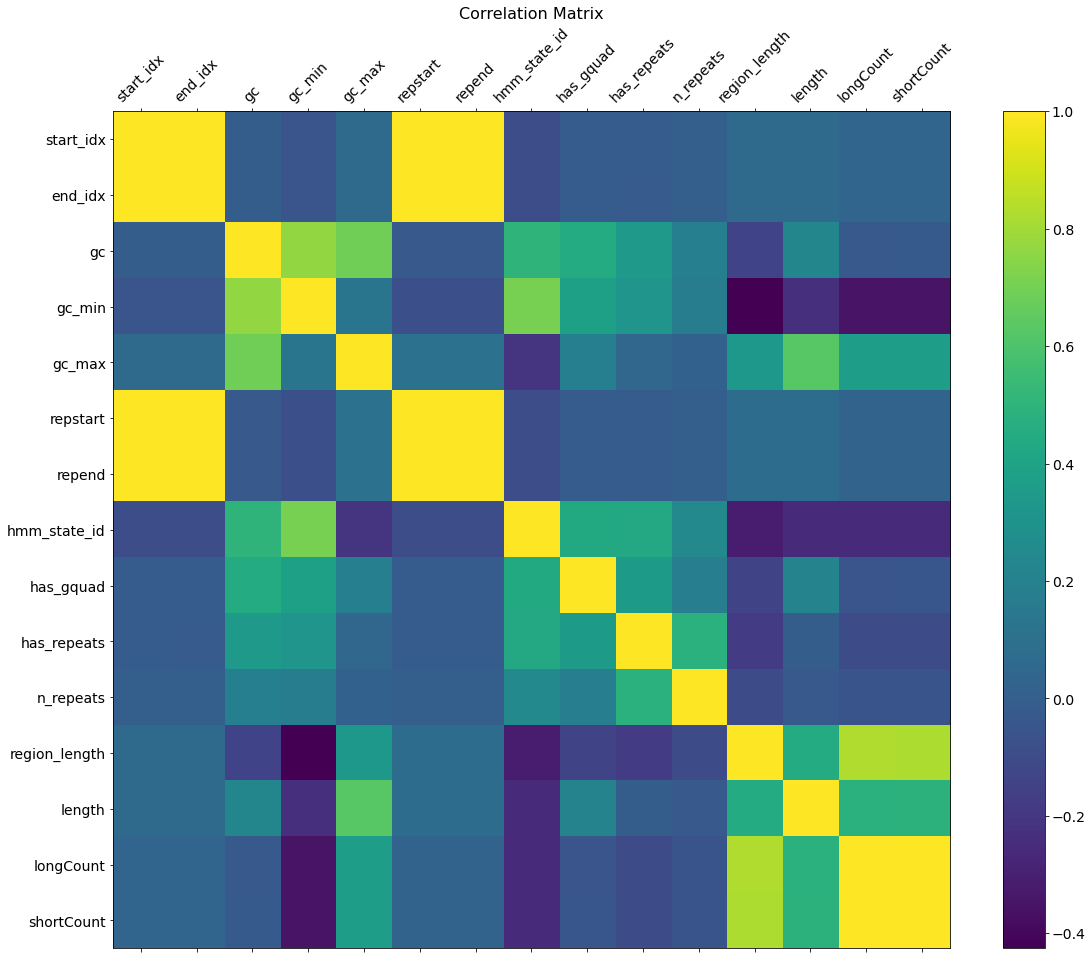

In [75]:
f = plt.figure(figsize=(19, 15))
plt.matshow(mydata.corr(), fignum=f.number)
plt.xticks(range(mydata.select_dtypes(['number']).shape[1]), mydata.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(mydata.select_dtypes(['number']).shape[1]), mydata.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
#This doesn't really you much or make sense to be honest

In [ ]:
#To do next
#make a code that looks for patterns within the patterns (e.g. do all normal longest repeats share a minimum sequence in column?)
#do i still take them into consideration even if some of the values are missing?
#summaries on diff istates-average, size range of them, size differences, numbers, how many have repeats, stats on pattern matching, compare the patterns